# Magnetic Fields and Forces

We return to our starting point

$$
  \vec F = q\vec E
$$

expressing the force, $\vec F$, felt by a charge, $q$, in an electric field, $\vec E$. We now ask what happens if we add a magnetic field, $\vec B$, to our experiment. Experimentalists determined that $\vec B$ affects only moving charges and that it pushes them in a direction perpendicular to the plane spanned by $\vec B$ and the charge velocity, $\vec v$. This is expressed through the compact formula

$$
  \vec F = q\vec E + q\vec v\times\vec B
$$

where $\vec v\times\vec B$ is the **cross product** of $\vec v$ and $\vec B$. Our book offers us a convenient means, a so-called **right hand rule**, to find the **direction** of $\vec v\times\vec B$. It's **magnitude** is

$$
  \|\vec v\times\vec B\| = \|\vec v\|\|\vec B\|\sin(\theta)
$$

where $\theta$ is the angle separating $\vec v$ and $\vec B$. As with our work on Electric Fields this requires us to think, work, and express ourselves in 3 dimensions. To think and work means to follow the algebra, while to express ourselves means to be able to graph our pieces and results in 3D - and for this there is not a better tool than python.

<IPython.core.display.Javascript object>


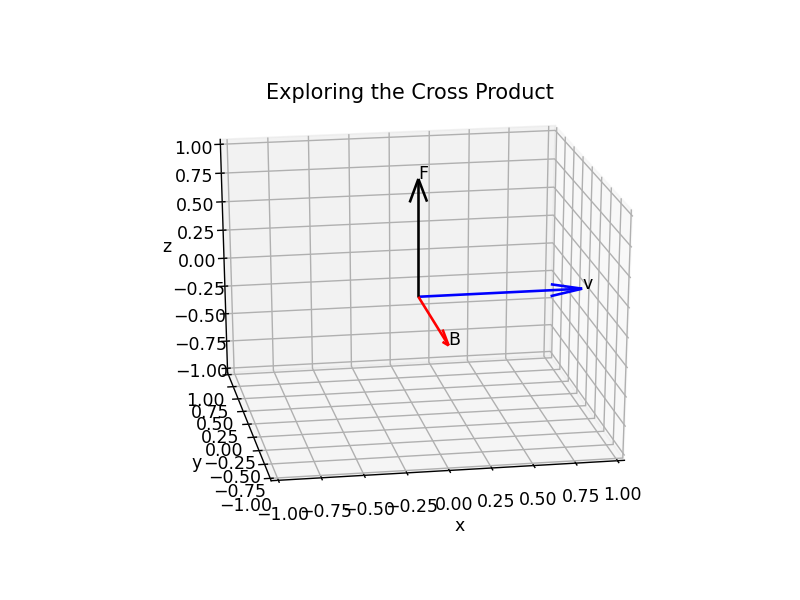

v cross B =  [ 0.  0. -1.]


Text(0.5, 0.92, 'Exploring the Cross Product')

In [63]:
# a cool way to give you more control of your plots
%matplotlib notebook   
import matplotlib.pyplot as plt
import numpy as np

ax = plt.axes(projection="3d")

q = -1

v = np.array([1,0,0])   # v is directed along x axis
v = v / np.linalg.norm(v)  # our view window is set up for vectors of length 1
ax.quiver3D(0, 0, 0, v[0], v[1], v[2], color = 'b', arrow_length_ratio=0.2) 
ax.text(v[0],v[1],v[2],'v')   # label it

B = np.array([0,-1,0])   # B is directed along y axis
B = B / np.linalg.norm(B)   # our view window is set up for vectors of length 1
ax.quiver3D(0, 0, 0, B[0], B[1], B[2], color = 'r', arrow_length_ratio=0.2) 
ax.text(B[0],B[1],B[2],'B')

vcB = np.cross(v,B)    # take their cross product
F = q*vcB
ax.quiver3D(0, 0, 0, F[0], F[1], F[2], color = 'k', arrow_length_ratio=0.2)
ax.text(F[0],F[1],F[2],'F')

print('v cross B = ', vcB)   # v cross B is directed along z axis

plt.xlim([-1,1])
ax.set_xlabel('x')
plt.ylim([-1,1])
ax.set_ylabel('y')
ax.set_zlim([-1,1])
ax.set_zlabel('z')
plt.title('Exploring the Cross Product')

From here we can solve exercise 15, 17 and 19 from Chapter 11.

***

The moving charges that most interest us are the electrons that carry current in wires. If such a wire is subjected to a magnetic field, $\vec B$, each electron will feel the force

$$
  e\vec v\times\vec B.
$$

Now, if the wire has cross-sectional area $A$, and there are $n$ electrons per unit volume then the current is

$$
  I = neA\|\vec v\|.
$$

As $\vec v$ is directed along the wire, and the wire has direction $\vec\ell$ (that is a script "ell" for line) it follows that the force on the wire is

$$
  \boxed{\vec F = I \vec\ell\times\vec B}
$$

From here we can solve exercises 34, 35 and 44, using our python cross-product illustrator.

The coolest application of this force formula is to explain how electric motors work, by showing how current in a loop between magnets provides a torque.

<IPython.core.display.Javascript object>


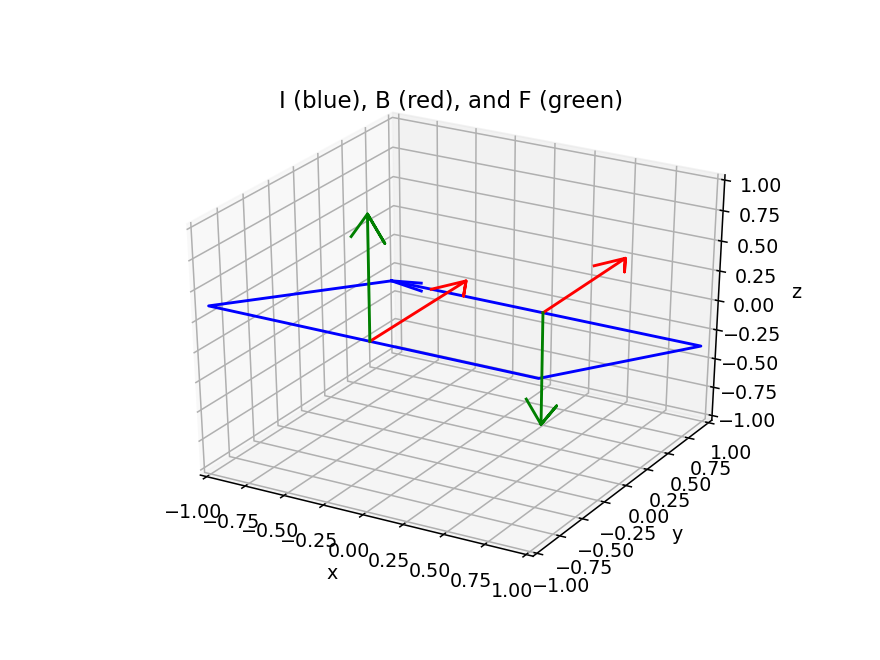

interactive(children=(FloatSlider(value=0.7853981633974483, description='theta', max=2.356194490192345, min=-0…

In [104]:
# draw the current carrying loop

from ipywidgets import *

fig = plt.figure()

ax = plt.axes(projection="3d")

theta = np.pi/4
s = np.sin(theta)
c = np.cos(theta)

x = np.array([-1,1,1,-1,-1])
y = np.array([1,1,-1,-1,1])
z = np.array([-1,-1,1,1,-1])

Ix = np.array([-0.8, -1, -0.8])
Iy = np.array([1, 1, 1])
Iz = np.array([-1.1, -1, -0.9])

I, = ax.plot3D(Ix, s*Iy, c*Iz, 'b')

wire, = ax.plot3D(x,s*y,c*z, 'b')
Blo, = ax.plot3D([0, 0, 0.1, 0, -0.1], [s, s+1, s+0.8, s+1, s+0.8], [-c, -c, -c, -c, -c], 'r') 
Flo, = ax.plot3D([0, 0, 0.1, 0, -0.1], [s, s, s, s, s], [-c, -c-1, -c-0.8, -c-1, -c-0.8], 'g')
Bhi, = ax.plot3D([0, 0, 0.1, 0, -0.1], [-s, -s+1, -s+0.8, -s+1, -s+0.8], [c, c, c, c, c], 'r') 
Fhi, = ax.plot3D([0, 0, 0.1, 0, -0.1], [-s, -s, -s, -s, -s], [c, c+1, c+0.8, c+1, c+0.8], 'g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('I (blue), B (red), and F (green)')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

def update(theta = np.pi/4):
    s = np.sin(theta)
    c = np.cos(theta)
    wire.set_data_3d(x, s*y, c*z)
    I.set_data_3d(np.sign(theta)*Ix, s*Iy, c*Iz)
    Blo.set_data_3d([0, 0, 0.1, 0, -0.1], [s, s+1, s+0.8, s+1, s+0.8], [-c, -c, -c, -c, -c])
    Flo.set_data_3d([0, 0, 0.1, 0, -0.1], [s, s, s, s, s], [-c, -c-np.sign(theta), -c-np.sign(theta)*0.8, -c-np.sign(theta), -c-np.sign(theta)*0.8])
    Bhi.set_data_3d([0, 0, 0.1, 0, -0.1], [-s, -s+1, -s+0.8, -s+1, -s+0.8], [c, c, c, c, c])
    Fhi.set_data_3d([0, 0, 0.1, 0, -0.1], [-s, -s, -s, -s, -s], [c, c+np.sign(theta), c+np.sign(theta)*0.8, c+np.sign(theta), c+np.sign(theta)*0.8])
    fig.canvas.draw_idle()

interact(update);

**Homework 7.** Submit a jupyter notebook that solves Chapter 11 Exercises 15, 17, 19, 33, 34, 35 and 44. In the first 6 suppose all given vectors are in the (x,z) plane and that into the page means (0,1,0) while out of the page means (0,-1,0). Please label each figure with the problem you are solving, e.g., Problem 15(c).